In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

# Load dataset
data = pd.read_csv('data.csv')

# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Convert diagnosis labels to binary values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Add intercept term to the feature matrix
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Set hyperparameters for Adam optimization
learning_rate = 0.0001
iterations = 500
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Initialize Adam optimization variables
m = np.zeros(X_train.shape[1])
v = np.zeros(X_train.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define loss function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    return J

# Define gradient function
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1 / m) * X.T.dot(h - y)
    return grad

# Run Adam optimization
for i in range(iterations):
    # Compute gradients and cost
    cost = compute_cost(X_train, y_train, theta)
    grad = gradient(X_train, y_train, theta)
    
    # Update Adam optimization variables
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.power(grad, 2)
    m_hat = m / (1 - np.power(beta1, i+1))
    v_hat = v / (1 - np.power(beta2, i+1))
    
    # Update parameters
    theta = theta - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    
    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f'Iteration {i}: cost = {cost:.5f}')
        
# Make predictions on test set
y_pred = sigmoid(X_test.dot(theta))
y_pred = np.round(y_pred)

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.5f}')


Iteration 0: cost = 0.69315
Iteration 100: cost = 0.62997
Iteration 200: cost = 0.57658
Iteration 300: cost = 0.53130
Iteration 400: cost = 0.49254
Accuracy: 0.93860


Text(0.5, 1.0, 'Correlation Matrix')

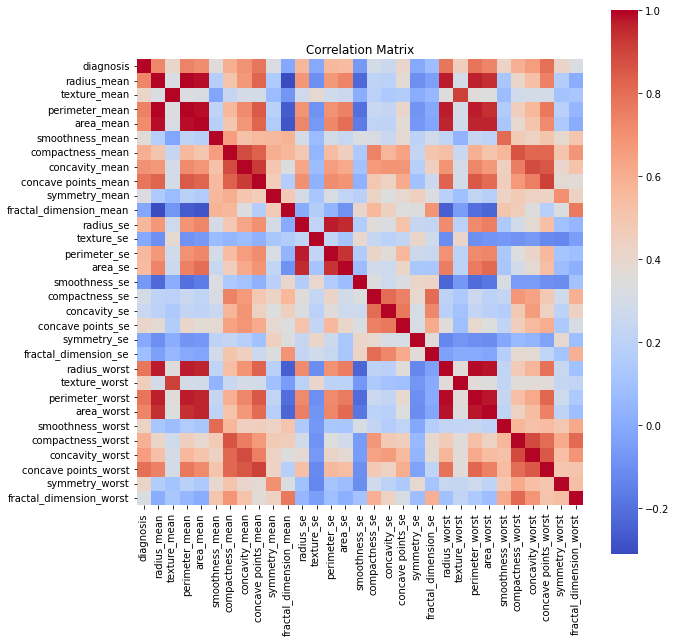

In [5]:
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, square=True, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')


In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define hyperparameters
learning_rate = 0.0001
iterations = 500
batch_size = 32

# Define initial weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Define mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, weights, bias, learning_rate, iterations, batch_size):
    m = X.shape[0] # number of training examples
    num_batches = int(m/batch_size) # number of batches
    cost_history = []
    for i in range(iterations):
        cost = 0
        for j in range(num_batches):
            # select a mini-batch of examples
            X_batch = X[j*batch_size:(j+1)*batch_size]
            y_batch = y[j*batch_size:(j+1)*batch_size]
            # calculate the logits
            z = np.dot(X_batch, weights) + bias
            # apply sigmoid activation function
            y_pred = 1/(1 + np.exp(-z))
            # calculate cost
            cost += (-1/batch_size) * np.sum(y_batch*np.log(y_pred) + (1-y_batch)*np.log(1-y_pred))
            # calculate gradients
            dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1/batch_size) * np.sum(y_pred - y_batch)
            # update weights and bias
            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db
        cost_history.append(cost)
    return weights, bias, cost_history

# Train the model using mini-batch gradient descent
weights, bias, cost_history = mini_batch_gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations, batch_size)

# Predict labels for test set
z = np.dot(X_test, weights) + bias
y_pred = 1/(1 + np.exp(-z))
y_pred = np.round(y_pred)

# Calculate accuracy
accuracy2 = (y_pred == y_test).mean()
print("Accuracy:", accuracy2)

Accuracy: 0.9122807017543859


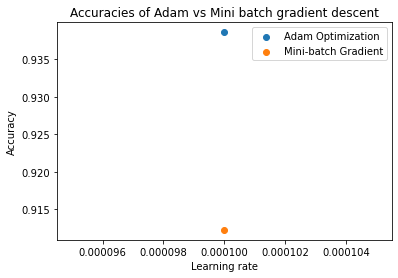

In [7]:
# Define learning rates and accuracies
learning_rates = [0.0001]


# Plot the accuracies vs. learning rates
plt.scatter(learning_rates, accuracy, label='Adam Optimization')
plt.scatter(learning_rates, accuracy2, label='Mini-batch Gradient')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies of Adam vs Mini batch gradient descent')

plt.show()